In [1]:
pwd

'D:\\GATE\\07_Projects\\01_Buildings_identification\\Data and Sources'

In [8]:
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import imageio
# imageio.plugins.freeimage.download()

In [6]:
# # Single Images
# path_img = path_pan_mul_tif = r"D:\GATE\07_Projects\01_Buildings_identification\Data and Sources\AOI_3_Paris_Train/MUL-PanSharpen/MUL-PanSharpen_AOI_3_Paris_img125.tif"
# path_img = r'D:\GATE\07_Projects\01_Buildings_identification\Data and Sources\Sofia\tiles_image\raster_cut_v1_690913_4723786.tif'

In [9]:
# Training Data
source_dir = "AOI_3_Paris_Train/4bands_train"
dest_dir = "AOI_3_Paris_Train/4bands_png"

In [10]:
for imagery in os.listdir(source_dir):
    
    image_path = os.path.join(source_dir, imagery)
    tif = gdal.Open(image_path)
    png_image_name = imagery.split(sep='.')[0] + ".png"
    dest_path = os.path.join(dest_dir, png_image_name)
    
    red = tif.GetRasterBand(1).ReadAsArray()
    green = tif.GetRasterBand(2).ReadAsArray()
    blue = tif.GetRasterBand(3).ReadAsArray()
    nir = tif.GetRasterBand(4).ReadAsArray()
    
    img_stack = np.stack([red, green, blue, nir], axis=-1)
    
    imageio.imwrite(dest_path, img_stack, 'PNG-FI')

In [ ]:
generated_png = imageio.imread('1.png', 'PNG-FI')

In [12]:
img_path = r'D:\GATE\07_Projects\01_Buildings_identification\Data and Sources\AOI_3_Paris_Train\4bands_png\4Bands_img1013.png'
tif_path = r'D:\GATE\07_Projects\01_Buildings_identification\Data and Sources\AOI_3_Paris_Train\4bands_train\4Bands_img1013.tif'

In [13]:
generated_png = imageio.imread(img_path, 'PNG-FI')

In [14]:
tif = gdal.Open(tif_path)

In [17]:
red = tif.GetRasterBand(1).ReadAsArray()
green = tif.GetRasterBand(2).ReadAsArray()
blue = tif.GetRasterBand(3).ReadAsArray()
nir = tif.GetRasterBand(4).ReadAsArray()

img_stack = np.stack([red, green, blue, nir], axis=-1)

In [19]:
print(np.all(img_stack==generated_png))

True


In [21]:
def display_rgb(b_r, b_g, b_b, alpha=1., figsize=(10, 10)):
    rgb = np.stack([b_r, b_g, b_b], axis=-1)
    rgb = rgb/rgb.max() * alpha
    print(rgb.max())
    plt.figure(figsize=(5, 5))
    plt.imshow(rgb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3.5


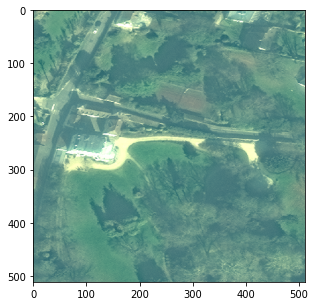

In [27]:
display_rgb(red, green, blue, alpha=3.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3.5


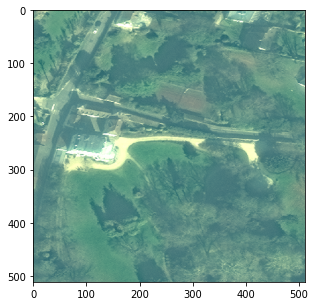

In [30]:
display_rgb(generated_png[:,:,0], generated_png[:,:,1], generated_png[:,:,2], alpha=3.5)